In [1]:
import pandas as pd
import numpy as np

from tensorflow import keras
from tensorflow.keras import layers

from sklearn.preprocessing import LabelEncoder

In [2]:
baseData = pd.read_csv("../../dataset/feature_regression_example.csv")
baseData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155
...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361


In [3]:
labelEn = LabelEncoder()
baseData["HOLIDAY_NO"] = labelEn.fit_transform(baseData.HOLIDAY)
baseData["PROMOTION_NO"] = labelEn.fit_transform(baseData.PROMOTION)
baseData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,HOLIDAY_NO,PROMOTION_NO
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,0,1
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,0,1
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888,1,1
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888,0,1
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361,0,1
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361,0,1


In [4]:
label = ["QTY"]
features = ['HCLUS', 'HOLIDAY_NO', 'PROMOTION_NO', 'PRO_PERCENT']
features

['HCLUS', 'HOLIDAY_NO', 'PROMOTION_NO', 'PRO_PERCENT']

In [5]:
stdRatio = 0.7

In [6]:
stdIndex = int(baseData.shape[0] * stdRatio)
stdIndex

73

In [7]:
stdYearWeek = baseData.loc[stdIndex].YEARWEEK
stdYearWeek

201621

In [8]:
trainFeat = baseData.loc[baseData.YEARWEEK <= stdYearWeek, features]
trainLabel = baseData.loc[baseData.YEARWEEK <= stdYearWeek, label]
testFeat = baseData.loc[baseData.YEARWEEK > stdYearWeek, features]
testLabel = baseData.loc[baseData.YEARWEEK > stdYearWeek, label]

In [9]:
print(trainFeat.shape)
print(trainLabel.shape)
print(testFeat.shape)
print(testLabel.shape)

(74, 4)
(74, 1)
(31, 4)
(31, 1)


In [10]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [11]:
inputShape = trainFeat.loc[0,:].shape
inputShape

(4,)

In [12]:
model = Sequential()
model.add(Dense(units=8, activation="relu", input_shape = inputShape))#, name="sss") ) # 시작
model.add(Dense(units=8, activation="relu")) # 히든 레이어
model.add(Dense(units=1, activation="relu")) # 끝

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 40        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


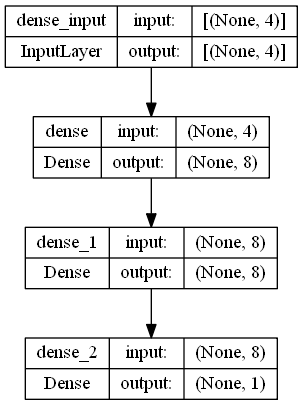

In [25]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file = "model_plot.png",
           show_shapes = True,
           show_layer_names = True)

In [26]:
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import metrics

In [27]:
model.compile( loss="mean_squared_error",
               optimizer = "adam",
               metrics = ["mean_squared_error","mean_absolute_error"])

In [28]:
history = model.fit( x=trainFeat, 
            y=trainLabel,
            batch_size=32, # 문제지를 32개씩 끊어본다. 1epoch에 weight+bias가 3번 업데이트 된다.
            epochs=500, # 전체문항을 다 봤을때 1epoch / 500epoch하면, batch_size까지 고려하면 1500이 된다.
            validation_split=0.2, #없으면 애는 무조건 1000,10000 정확도가 100%가 될 수 밖에 없다.
                                  # overfitting된다. 정확도는 100%지만, 쓸 수 없는 모델이다.
                                  # epoch가 한번 넘어갈 때마다 해당 비율로 따로 빼서 푼다.
                                  # val_MSE가 줄다가 어느 순간 올라간다.
         )
# 훈련을 돌릴때마다 마지막 weight부터 시작한다.

Epoch 1/500
2/2 [==============================] - 1s 152ms/step - loss: 2048139.2500 - mean_squared_error: 2048139.2500 - mean_absolute_error: 1130.7119 - val_loss: 1114024.7500 - val_mean_squared_error: 1114024.7500 - val_mean_absolute_error: 878.2667
Epoch 2/500
2/2 [==============================] - 0s 27ms/step - loss: 2048139.5000 - mean_squared_error: 2048139.5000 - mean_absolute_error: 1130.7119 - val_loss: 1114024.7500 - val_mean_squared_error: 1114024.7500 - val_mean_absolute_error: 878.2667
Epoch 3/500
2/2 [==============================] - 0s 27ms/step - loss: 2048139.3750 - mean_squared_error: 2048139.3750 - mean_absolute_error: 1130.7119 - val_loss: 1114024.7500 - val_mean_squared_error: 1114024.7500 - val_mean_absolute_error: 878.2667
Epoch 4/500
2/2 [==============================] - 0s 27ms/step - loss: 2048139.3750 - mean_squared_error: 2048139.3750 - mean_absolute_error: 1130.7119 - val_loss: 1114024.7500 - val_mean_squared_error: 1114024.7500 - val_mean_absolute_err

In [29]:
features

['HCLUS', 'HOLIDAY_NO', 'PROMOTION_NO', 'PRO_PERCENT']

In [30]:
inHclus = 1
inHoli = 1
inPROMO = 1
inProper = 0.3

In [31]:
from sklearn import neural_network

In [32]:
neural_network.MLPRegressor()

MLPRegressor()

In [33]:
testDf = pd.DataFrame([[inHclus,inHoli,inPROMO,inProper]])
testDf

,0,1,2,3
0,1,1,1,0.3


In [34]:
model.predict(testDf)

1/1 [==============================] - 0s 51ms/step


array([[0.]], dtype=float32)